In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler 
from sklearn import datasets
import warnings
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
warnings.filterwarnings('ignore')

In [2]:
boston = datasets.load_boston()
features = pd.DataFrame(boston.data, columns= boston.feature_names)
targets = boston.target


In [3]:
features.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df=pd.DataFrame(boston.data, columns= boston.feature_names)
df['MEDV']=boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


##### CRIM: Per capita crime rate by town
##### ZN: Proportion of residential land zoned for lots over 25,000 sq. ft
##### INDUS: Proportion of non-retail business acres per town
##### CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
##### NOX: Nitric oxide concentration (parts per 10 million)
##### RM: Average number of rooms per dwelling
##### AGE: Proportion of owner-occupied units built prior to 1940
##### DIS: Weighted distances to five Boston employment centers
##### RAD: Index of accessibility to radial highways
##### TAX: Full-value property tax rate per USD 10,000
##### PTRATIO: Pupil-teacher ratio by town
##### B: 1000(Bk — 0.63)², where Bk is the proportion of [people of African American descent] by town
##### LSTAT: Percentage of lower status of the population
##### MEDV: Median value of owner-occupied homes in USD 1000s

In [5]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


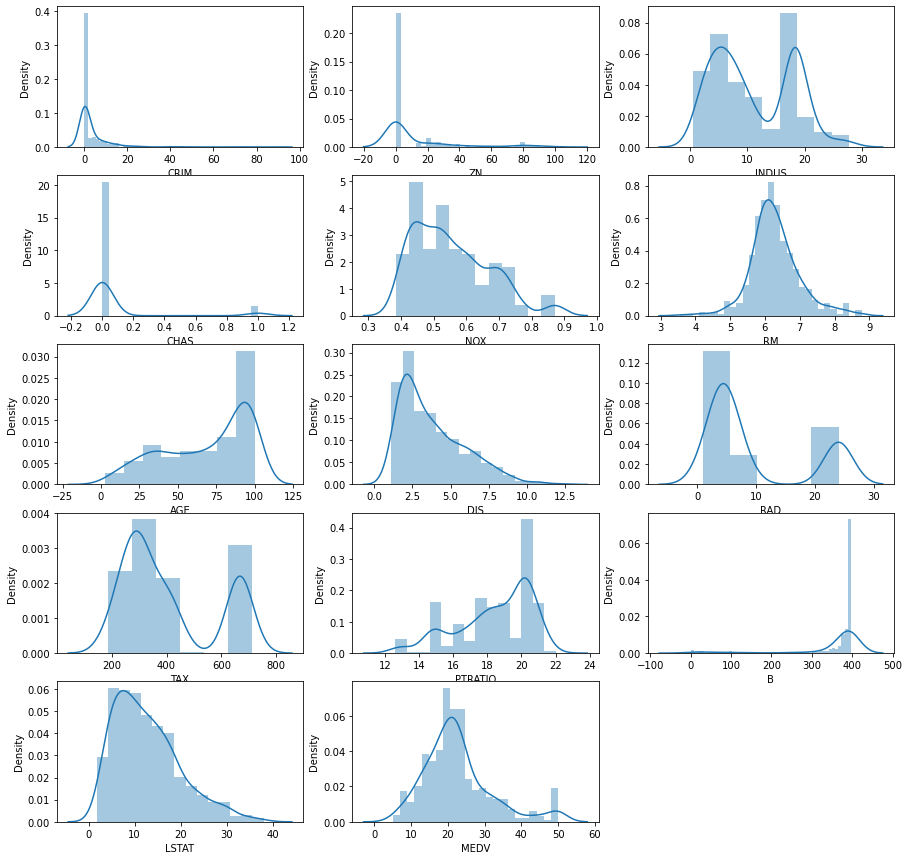

In [6]:
j=1
plt.figure(figsize=(15,15), facecolor='white')
for i in df:
    plt.subplot(5, 3, j)
    sns.distplot(df[i])
    plt.xlabel(i)
    j+=1

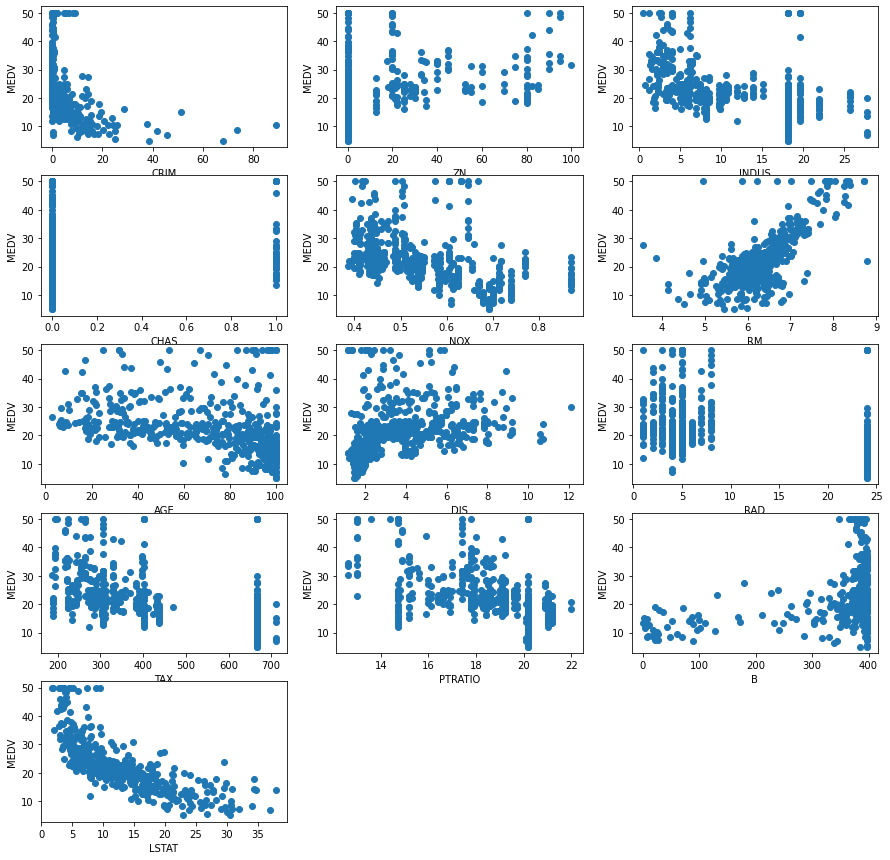

In [7]:
j=1
plt.figure(figsize=(15,15), facecolor='white')
for i in df.drop(columns='MEDV'):
    plt.subplot(5, 3, j)
    plt.scatter(df[i], df['MEDV'])
    plt.xlabel(i)
    plt.ylabel('MEDV')
    j+=1

<AxesSubplot:>

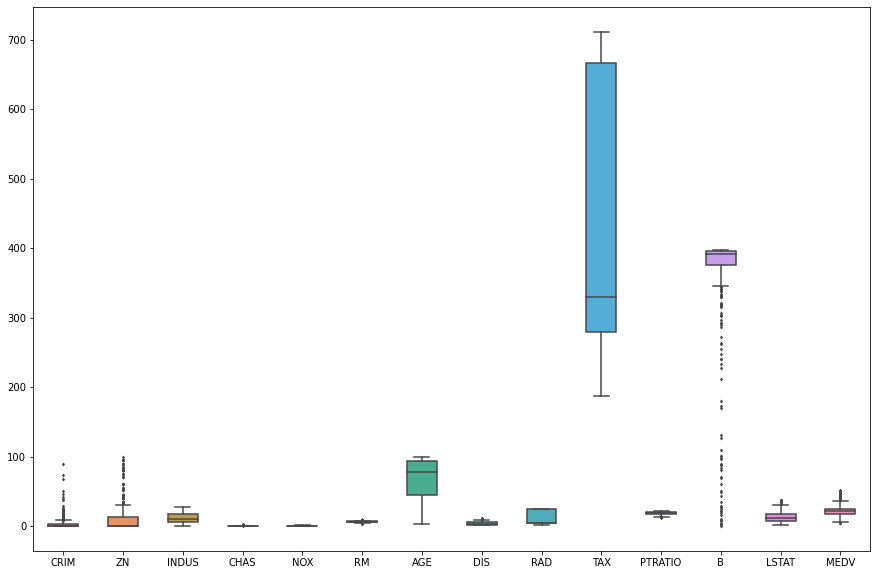

In [8]:
fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=df, width= 0.5,ax=ax,  fliersize=2)

In [9]:
x_train,x_test,y_train,y_test = train_test_split(features,df['MEDV'],test_size = 0.20, random_state= 355)

In [10]:
features

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [11]:
rand_reg=RandomForestRegressor(random_state=7)

In [12]:
rand_reg.fit(x_train, y_train)

RandomForestRegressor(random_state=7)

In [13]:
rand_reg.score(x_train,y_train)

0.9834888764938776

In [14]:
x_test

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
488,0.15086,0.0,27.74,0.0,0.6090,5.454,92.7,1.8209,4.0,711.0,20.1,395.09,18.06
128,0.32543,0.0,21.89,0.0,0.6240,6.431,98.8,1.8125,4.0,437.0,21.2,396.90,15.39
191,0.06911,45.0,3.44,0.0,0.4370,6.739,30.8,6.4798,5.0,398.0,15.2,389.71,4.69
53,0.04981,21.0,5.64,0.0,0.4390,5.998,21.4,6.8147,4.0,243.0,16.8,396.90,8.43
388,14.33370,0.0,18.10,0.0,0.7000,4.880,100.0,1.5895,24.0,666.0,20.2,372.92,30.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0.12329,0.0,10.01,0.0,0.5470,5.913,92.9,2.3534,6.0,432.0,17.8,394.95,16.21
281,0.03705,20.0,3.33,0.0,0.4429,6.968,37.2,5.2447,5.0,216.0,14.9,392.23,4.59
43,0.15936,0.0,6.91,0.0,0.4480,6.211,6.5,5.7209,3.0,233.0,17.9,394.46,7.44
33,1.15172,0.0,8.14,0.0,0.5380,5.701,95.0,3.7872,4.0,307.0,21.0,358.77,18.35


In [15]:
rand_reg.score(x_test,y_test)

0.8548884969955889

In [16]:
# we are tuning three hyperparameters right now, we are passing the different values for both parameters
grid_param = {
    "n_estimators" : [90,100],
    'criterion': ['mse', 'mae'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : [1,2,3,4],
    'min_samples_split': [2,3,4,5],
    'max_features' : ['auto','log2']
}

In [17]:
grid_search = GridSearchCV(estimator=rand_reg,param_grid=grid_param,cv=2,n_jobs =-1,verbose = 3)

In [18]:
grid_search.fit(x_train,y_train)

Fitting 2 folds for each of 2304 candidates, totalling 4608 fits


GridSearchCV(cv=2, estimator=RandomForestRegressor(random_state=7), n_jobs=-1,
             param_grid={'criterion': ['mse', 'mae'], 'max_depth': range(2, 20),
                         'max_features': ['auto', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4, 5],
                         'n_estimators': [90, 100]},
             verbose=3)

In [19]:
#let's see the best parameters as per our grid search
grid_search.best_params_

{'criterion': 'mae',
 'max_depth': 13,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 100}

In [36]:
rand_reg = RandomForestRegressor(criterion= 'mae',
 max_depth = 13,
 max_features = 'log2',
 min_samples_leaf = 1,
 min_samples_split= 3,
 n_estimators = 100)

In [37]:
rand_reg.fit(x_train,y_train)

RandomForestRegressor(criterion='mae', max_depth=13, max_features='log2',
                      min_samples_split=3)

In [38]:
rand_reg.score(x_train,y_train)

0.9766229188486595

In [39]:
rand_reg.score(x_test,y_test)

0.8708566337084214

## Bagging

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
dt_reg=DecisionTreeRegressor(random_state=7)

In [26]:
dt_reg.fit(x_train, y_train)

DecisionTreeRegressor(random_state=7)

In [27]:
dt_reg.score(x_train, y_train)

1.0

In [28]:
dt_reg.score(x_test, y_test)

0.5359151016937814

In [29]:
bag_dt_reg=BaggingRegressor(DecisionTreeRegressor(random_state=7), n_estimators=5, max_samples=0.5,
                           bootstrap=True, random_state=7, oob_score=True)

In [30]:
bag_dt_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=7),
                 max_samples=0.5, n_estimators=5, oob_score=True,
                 random_state=7)

In [31]:
bag_dt_reg.score(x_train, y_train)

0.9022825975213579

In [32]:
bag_dt_reg.score(x_test, y_test)

0.7797253055652952

In [33]:
#Pasting
pas_dt_reg=BaggingRegressor(DecisionTreeRegressor(random_state=7), n_estimators=5,
                           bootstrap=False, random_state=7)

In [34]:
pas_dt_reg.fit(x_train, y_train)

BaggingRegressor(base_estimator=DecisionTreeRegressor(random_state=7),
                 bootstrap=False, n_estimators=5, random_state=7)

In [35]:
pas_dt_reg.score(x_train, y_train), pas_dt_reg.score(x_test, y_test)

(1.0, 0.6915608502071738)